# ML Assignmnt 03: Decision Trees

Juee S (PD_49) PRN: 1032222572

Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
Dataset includes 14 variables such as Age, Sex, Cholesterol, Max Heart Rate, Exercise Induced Angina, etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [2]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart_data = pd.read_csv(dataset_url, names=columns)

Data Preprocessing

In [3]:
# Display first few rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Data Cleaning: Replace '?' with NaN and drop missing values
heart_data.replace('?', np.nan, inplace=True)
heart_data.dropna(inplace=True)
heart_data = heart_data.astype(float)

In [6]:
# Convert target variable to binary (0: No heart disease, 1: Heart disease)
heart_data["target"] = heart_data["target"].apply(lambda x: 1 if x > 0 else 0)

Visualizing Data

<ipython-input-8-8940607b12d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_data['target'], palette='coolwarm')


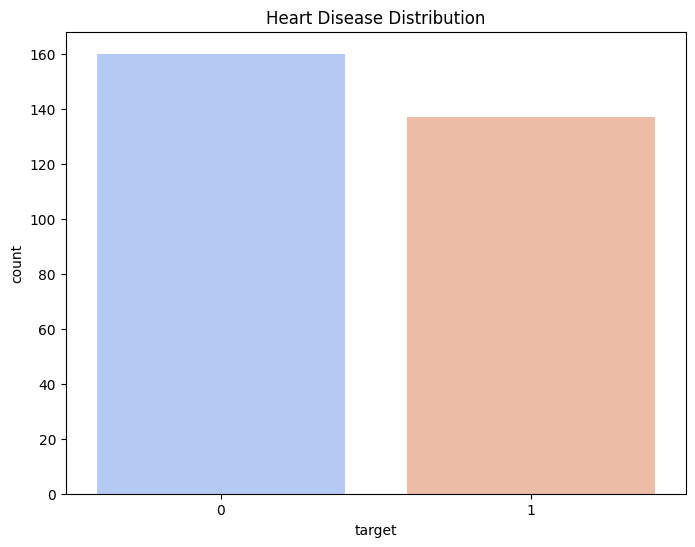

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x=heart_data['target'], palette='coolwarm')
plt.title("Heart Disease Distribution")
plt.show()

Preparing Data for Training/Testing

In [9]:
# Feature Selection
X = heart_data.drop(columns=["target"])
y = heart_data["target"]

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree and K-Fold Cross Validation

In [12]:
# Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)

In [14]:
# K-Fold Cross Validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Mean Cross-Validation Accuracy: 0.7406896551724138


In [15]:
# Train Model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predictions
y_pred = dt_classifier.predict(X_test)

Results

In [17]:
# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



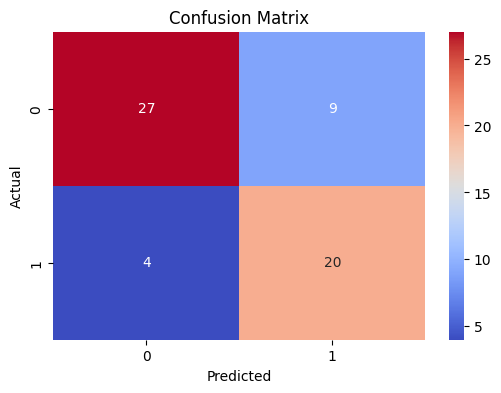

In [18]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

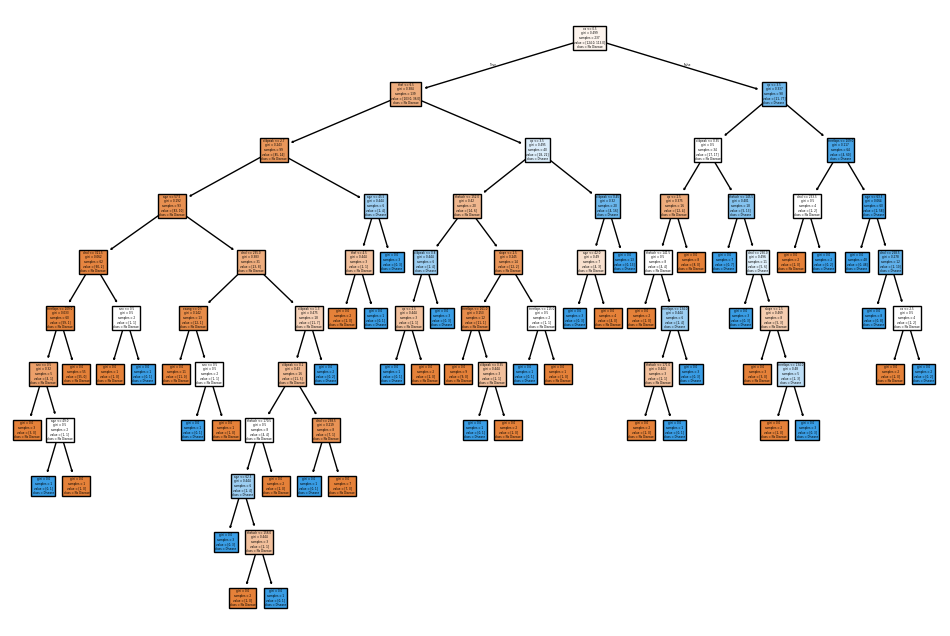

In [19]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()